In [2]:
import numpy as np
import scipy.stats as stats
from statsmodels.stats.descriptivestats import sign_test
import matplotlib.pyplot as plt

## Исходные данные

In [3]:
np.random.seed(404)
X = np.random.normal(-1, 2, 100)
Y = np.random.uniform(-2, 0, 100)

m_x = -1
m_y = -1
var_x = 4
var_y = 1/3

In [4]:
X_mean = np.mean(X)
Y_mean = np.mean(Y)

X_s = np.var(X, ddof = 1)
Y_s = np.var(Y, ddof = 1)

X_q = np.std(X, ddof = 1)
Y_q = np.std(Y, ddof = 1)

In [5]:
X_mean, X_s, X_q

(-0.7764808262435907, 4.019749373354324, 2.004931263997428)

In [11]:
bins_number = int(2*X.shape[0]**(1/3))
x_fr, _ = np.histogram(X, bins=bins_number)
x_fr

array([ 1,  5, 11, 23, 23, 14, 12,  5,  6], dtype=int64)

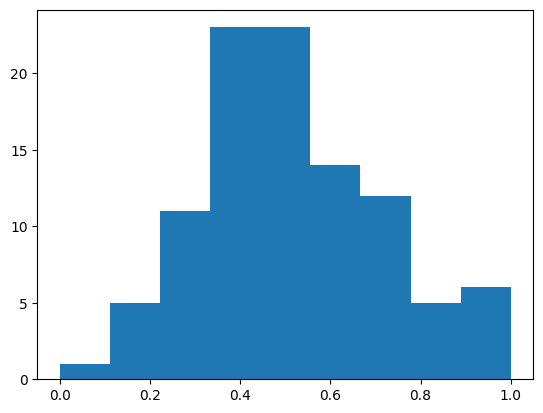

In [12]:
bins_number = int(2*X.shape[0]**(1/3))
# x_f, _, _ = plt.hist(X, bins=bins_number)
x_1 = (X + abs(min(X))) / (max(X) - min(X))
x_f, _, _ = plt.hist(x_1, bins=bins_number)
plt.show()

AttributeError: 'BarContainer' object has no attribute 'suptitle'

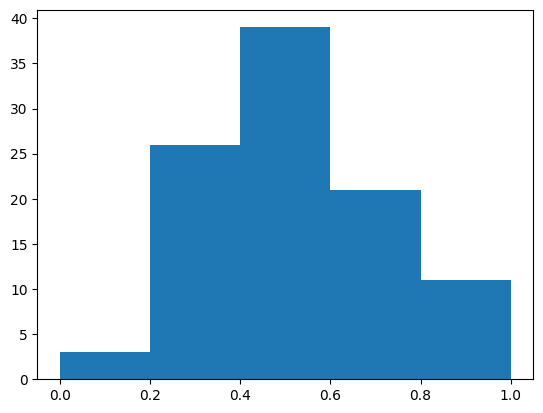

In [34]:
bins_number = 5
# x_f, _, _ = plt.hist(X, bins=bins_number)
x_1 = (X + abs(min(X))) / (max(X) - min(X))
x_f, _, p = plt.hist(x_1, bins=bins_number)
# p.suptitle('123')
# plt.title(label = 'NBins 5')
plt.show()

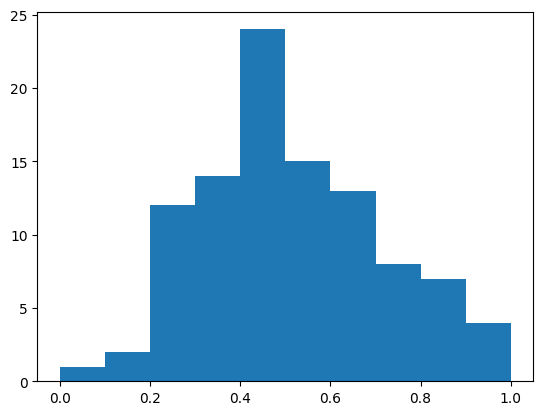

In [14]:
bins_number = 10
# x_f, _, _ = plt.hist(X, bins=bins_number)
x_1 = (X + abs(min(X))) / (max(X) - min(X))
x_f, _, _ = plt.hist(x_1, bins=bins_number)
plt.show()

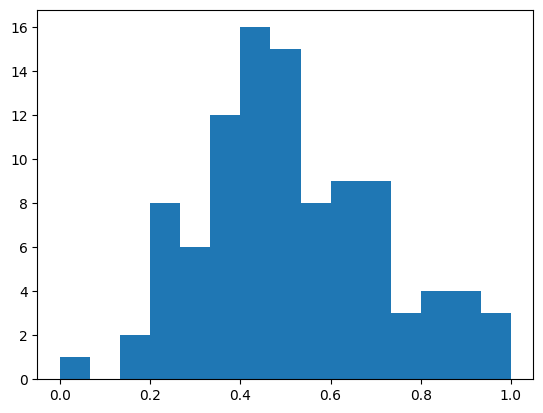

In [15]:
bins_number = 15
# x_f, _, _ = plt.hist(X, bins=bins_number)
x_1 = (X + abs(min(X))) / (max(X) - min(X))
x_f, _, _ = plt.hist(x_1, bins=bins_number)
plt.show()

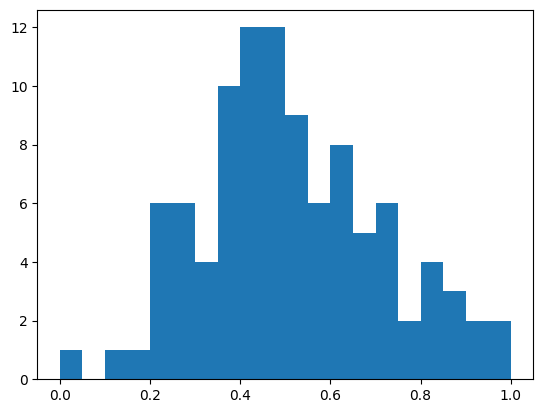

In [16]:
bins_number = 20
# x_f, _, _ = plt.hist(X, bins=bins_number)
x_1 = (X + abs(min(X))) / (max(X) - min(X))
x_f, _, _ = plt.hist(x_1, bins=bins_number)
plt.show()

In [46]:
# x = np.linspace(-10, 10, 10000)
# Y = stats.uniform.pdf(x, min(X), max(X) - min(X)) * np.mean(x_f)
# plt.plot(x,Y)

In [47]:
bins_number = int(2*X.shape[0]**(1/3))
X_hist = np.histogram(X, bins=bins_number)
stats.kstest(x_1, 'uniform')

KstestResult(statistic=0.05719738779120209, pvalue=0.2697275576535686)

KstestResult(statistic=0.05719738779120209, pvalue=0.2697275576535686)

In [48]:
stats.kstest(X, lambda x: stats.uniform.cdf(x, -abs(min(X)), max(X) - min(X)))

KstestResult(statistic=0.05719738779120209, pvalue=0.2697275576535686)

KstestResult(statistic=0.05719738779120209, pvalue=0.2697275576535686)

## Визуальное представление выборки

<AxesSubplot: title={'center': 'Гистограмма с 5 NBins'}>

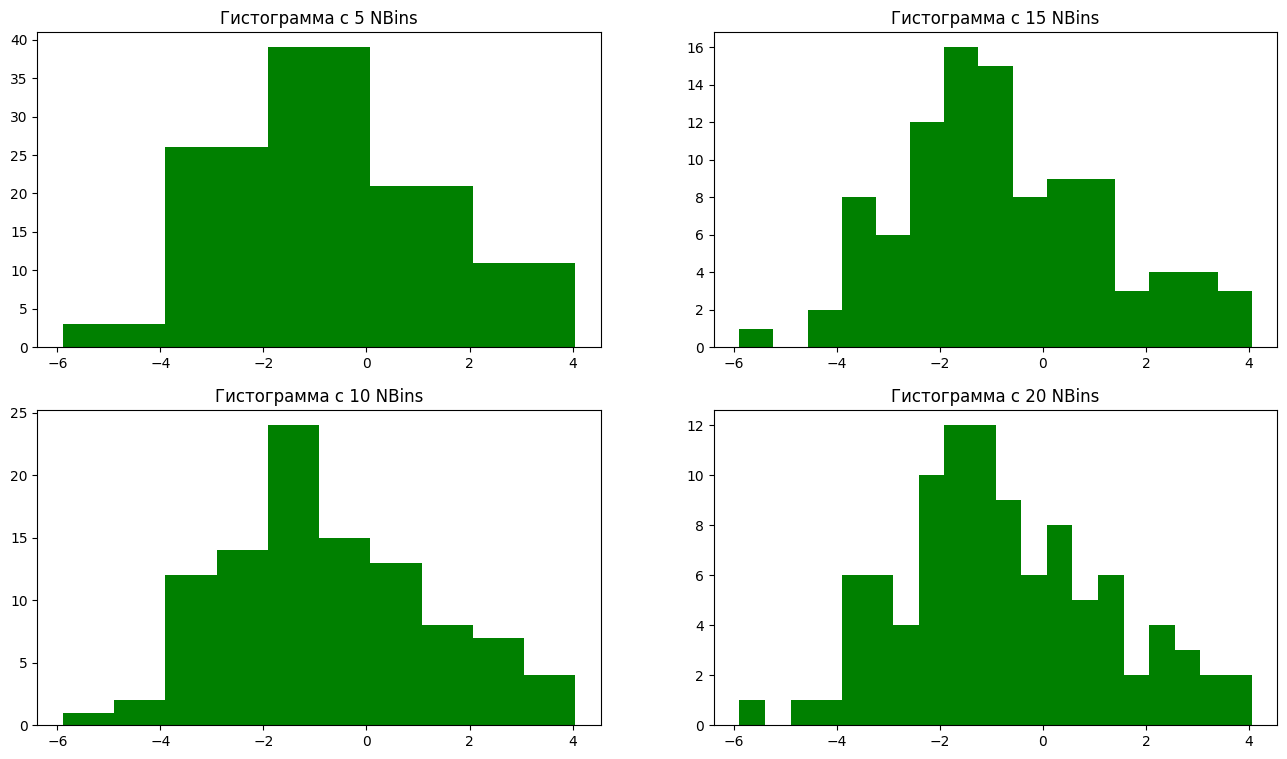

In [35]:
def plot_hist(array, ax, bins_num: int):
    ax.hist(array, bins = bins_num, color='green')
    ax.set_title(f'Гистограмма с {bins_num} NBins')
    return ax

fig, ax = plt.subplots(2, 2, figsize = (16, 9))
plot_hist(X, ax[0,0], 5)
plot_hist(X, ax[1,0], 10)
plot_hist(X, ax[0,1], 15)
plot_hist(X, ax[1,1], 20)

## Критерий хи-квадрат

### Статистическая гипотеза: $ H_0: X \sim N(m, \sigma) $

In [40]:
m = np.mean(X)
d = np.var(X, ddof = 1)
bins_number = int(2*X.shape[0]**(1/3))

In [48]:
def chisquare_normal(dist, m, d, bins, ddof=2):
    counts, bins1 = np.histogram(dist, bins=bins)
    normal = (stats.norm.cdf(bins1[1:], m, d) - stats.norm.cdf(bins1[:-1], m, d)) * dist.shape[0]
    Z = np.sum((counts - normal) ** 2 / normal)
    return Z, 1 - stats.chi2.cdf(Z, bins - 1 - ddof)

In [49]:
chisquare_normal(X, m, d, 5)

(31.405036823617802, 1.5152451471323047e-07)

$6.98 \cdot 10^{-7}$

In [50]:
chisquare_normal(X, m, d, 10)

(36.81506277241135, 5.084552776257745e-06)

$1.24 \cdot 10^{-5}$

In [51]:
chisquare_normal(X, m, d, 15)

(43.3912744632553, 1.938158092573694e-05)

$3.86 \cdot 10^{-5}$

In [52]:
chisquare_normal(X, m, d, 20)

(43.99816742200423, 0.00034271708104949283)

$5.77 \cdot 10^{-4}$

### Статистическая гипотеза: $ H_0: X \sim R $

In [53]:
def chisquare_uniform(dist, bins, ddof=2):
    counts, bins1 = np.histogram(dist, bins=bins)
    uniform = (stats.uniform.cdf(bins1[1:], min(dist), max(dist) - min(dist)) - stats.uniform.cdf(bins1[:-1], min(dist), max(dist) - min(dist))) * dist.shape[0]
    Z = np.sum((counts - uniform) ** 2 / uniform)
    return Z, 1 - stats.chi2.cdf(Z, bins - 1 - ddof)

In [58]:
chisquare_uniform(X, 5)

(38.39999999999998, 4.5871817455633845e-09)

In [59]:
chisquare_uniform(X, 10)

(44.39999999999999, 1.7878772173851587e-07)

In [56]:
chisquare_uniform(X, 15)

(50.90000000000001, 9.70107058906322e-07)

In [57]:
chisquare_uniform(X, 20)

(51.60000000000002, 2.3761690914780864e-05)

### Статистическая гипотеза: $ H_0: X \sim {\chi}^2(5) $

In [61]:
def chisquare_chi2(dist, bins, ddof=0):
    counts, bins1 = np.histogram(dist, bins=bins)
    chi2 = (stats.chi2.cdf(bins1[1:], 5) - stats.chi2.cdf(bins1[:-1], 5)) * dist.shape[0]
    Z = np.sum((counts - chi2) ** 2 / chi2)
    return Z, 1 - stats.chi2.cdf(Z, bins - 1 - ddof)

In [62]:
chisquare_chi2(X, 5)

C:\Users\PotatoHD\AppData\Local\Temp\ipykernel_11188\2144564589.py:4: RuntimeWarning: divide by zero encountered in divide
  Z = np.sum((counts - chi2) ** 2 / chi2)


(inf, 0.0)

In [63]:
chisquare_chi2(X, 10)

C:\Users\PotatoHD\AppData\Local\Temp\ipykernel_11188\2144564589.py:4: RuntimeWarning: divide by zero encountered in divide
  Z = np.sum((counts - chi2) ** 2 / chi2)


(inf, 0.0)

$\frac{0}{0}$

$\infty$

In [64]:
chisquare_chi2(X, 15)

C:\Users\PotatoHD\AppData\Local\Temp\ipykernel_11188\2144564589.py:4: RuntimeWarning: divide by zero encountered in divide
  Z = np.sum((counts - chi2) ** 2 / chi2)
C:\Users\PotatoHD\AppData\Local\Temp\ipykernel_11188\2144564589.py:4: RuntimeWarning: invalid value encountered in divide
  Z = np.sum((counts - chi2) ** 2 / chi2)


(nan, nan)

In [65]:
chisquare_chi2(X, 20)

C:\Users\PotatoHD\AppData\Local\Temp\ipykernel_11188\2144564589.py:4: RuntimeWarning: divide by zero encountered in divide
  Z = np.sum((counts - chi2) ** 2 / chi2)
C:\Users\PotatoHD\AppData\Local\Temp\ipykernel_11188\2144564589.py:4: RuntimeWarning: invalid value encountered in divide
  Z = np.sum((counts - chi2) ** 2 / chi2)


(nan, nan)

## Критерий Колмогорова

### Статистическая гипотеза: $ H_0: X \sim N(m, \sigma) $

In [68]:
stats.kstest(X, lambda x: stats.norm.cdf(x, np.mean(X), np.std(X, ddof=1)))

KstestResult(statistic=0.06725320093952492, pvalue=0.7305291365732776)

### Статистическая гипотеза: $ H_0: X \sim R $

In [69]:
stats.kstest(x_1, lambda x: stats.uniform.cdf(x, min(X), max(X) - min(X)))

KstestResult(statistic=0.5968755253976099, pvalue=1.4824991904981568e-34)

### Статистическая гипотеза: $ H_0: X \sim {\chi}^2(5) $

In [70]:
stats.kstest(X, lambda x: stats.chi2.cdf(x, 5))

KstestResult(statistic=0.7948519797163054, pvalue=3.372364281622096e-68)

## Двухвыборочные критерии 

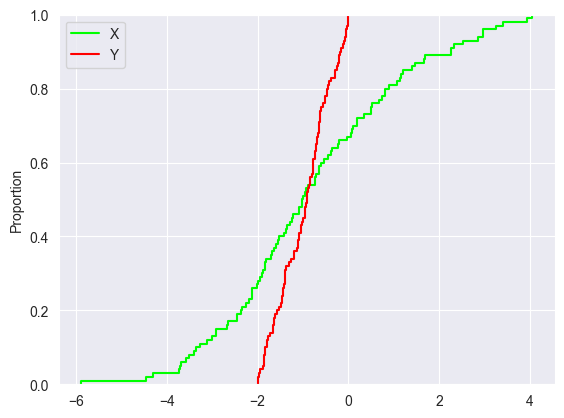

In [6]:
import seaborn as sns

sns.ecdfplot(x = X, color='lime')
sns.ecdfplot(x = Y, color='red')
plt.xlabel = 'values'
plt.legend(labels=['X', 'Y'])
plt.show()

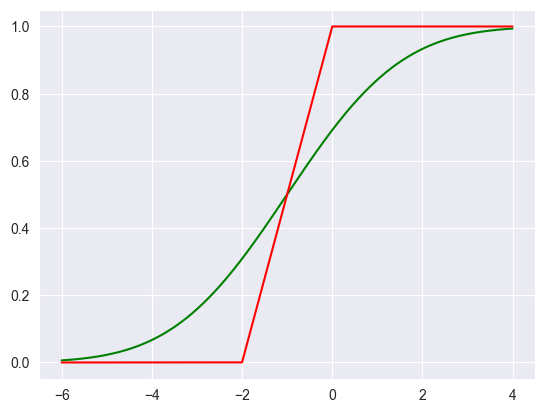

In [9]:
x = np.linspace(-6, 4, 100000)
y1 = stats.norm.cdf(x, -1, 2)
y2 = stats.uniform.cdf(x,-2, 2)
plt.plot(x, y1, color='green')
plt.plot(x, y2, color='red')
plt.show()

<AxesSubplot: ylabel='Count'>

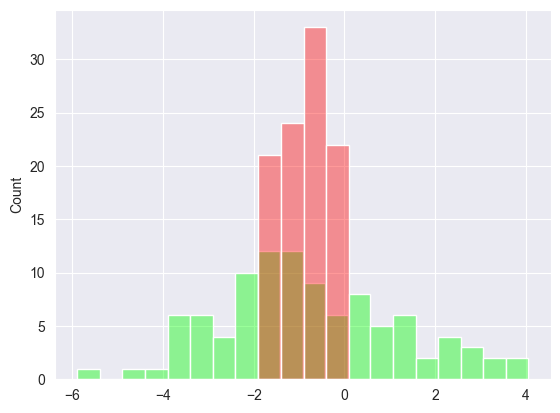

In [12]:

sns.histplot(X, bins = 20, color='lime', alpha =0.4)
sns.histplot(0.1 + Y, bins = 4, color = 'red', alpha = 0.4)

<AxesSubplot: ylabel='Proportion'>

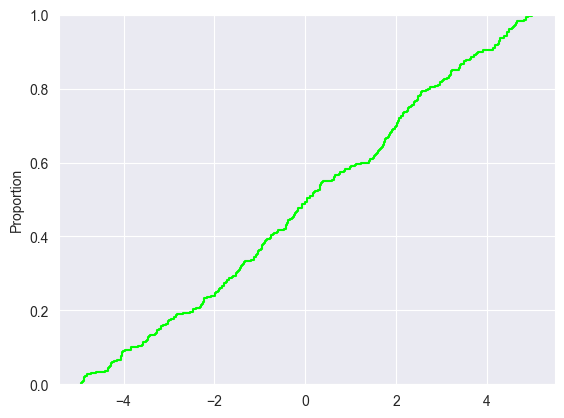

<AxesSubplot: ylabel='Proportion'>

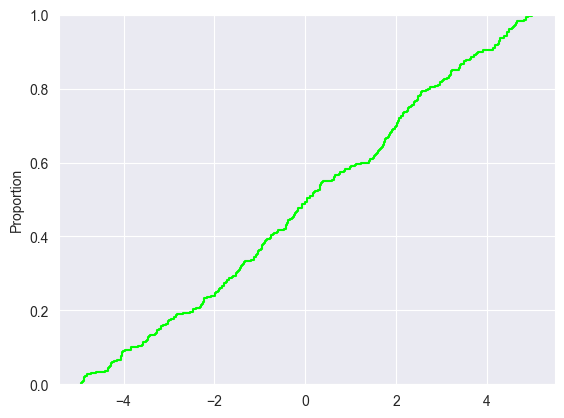

In [72]:
sns.ecdfplot(x = X, color='lime')

NameError: name 'bins_number' is not defined

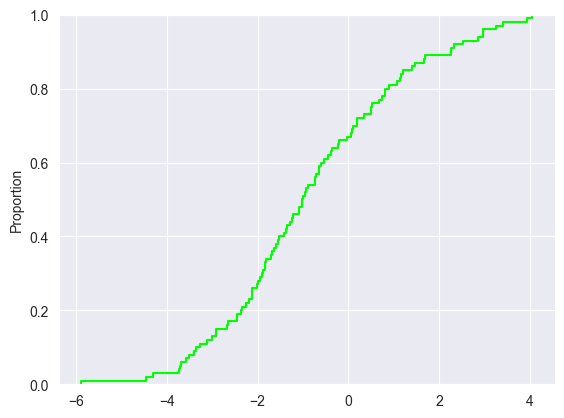

In [13]:
sns.ecdfplot(x = X, color='lime', label="ECDF")
count, bins_count = np.histogram(X, bins=bins_number)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
cdf1 = np.insert(cdf, 0, 0)
bins_count1 = np.insert(bins_count, 0, -5)
plt.plot(bins_count1[1:], cdf1, color='red',label="CDF")
plt.legend()

In [74]:
def two_sample_chisquare(dist1, dist2, bins=15):
    bins1, counts1 = np.histogram(dist1, bins=bins)
    bins2, counts2 = np.histogram(dist2, bins=bins)
    Z = np.sum((counts1 - counts2) ** 2 / counts1)
    return Z, 1 - stats.chi2.cdf(Z, 2)
    

Peasrson $ {\chi}^2 $ test

In [75]:
two_sample_chisquare(X, Y, bins_number)

(-0.0008474661813318725, 1.0)

(-0.0008474661813318725, 1.0)

Kolmogorov-Smirnov test

In [76]:
stats.ks_2samp(X, Y)

KstestResult(statistic=0.08666666666666667, pvalue=0.21005749381264038)

KstestResult(statistic=0.08666666666666667, pvalue=0.21005749381264038)

Sign-test


In [77]:
sign_test(X, Y)

(4.0, 0.6861754232113881)

(4.0, 0.6861754232113881)

U-test

In [78]:
stats.ranksums(X, Y)

RanksumsResult(statistic=0.8694884733068824, pvalue=0.3845800100471043)

RanksumsResult(statistic=0.8694884733068824, pvalue=0.3845800100471043)

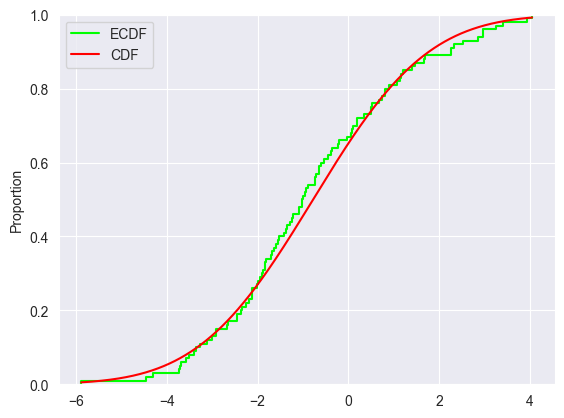

In [19]:
# sns.ecdfplot(x = X, color='lime', label="ECDF")
x = np.arange(min(X), max(X), 0.001)

sns.ecdfplot(x = X, color='lime',label="ECDF")
plt.plot(x, stats.norm.cdf(x, np.mean(X), np.std(X)), color='red', label="CDF")

plt.legend()